#  Self Study 3

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#from sklearn.datasets import fetch

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/theis/Repositories/MlSelf/.venv/lib64/python3.13/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code
  File "/tmp/ipykernel_16512/3475952469.py", line 1, in <module>
    import matplotlib.pyplot as plt
  File "/home/theis/Repositories/MlSelf/.venv/lib64/python3.13/site-packages/matplotlib/__init__.py", line 1296, in <module>
    rcParams['backend'] = os.environ.get('MPLBACKEND')
    ~~~~~~~~^^^^^^^^^^^
  File "/home/theis/Repositories/MlSelf/.venv/lib64/python3.13/site-packages/matplotlib/__init__.py", line 771, in __setitem__
    raise ValueError(f"Key {key}: {ve}") from None
ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 't

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='./data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [4]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe. The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [5]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148
  55   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  87 232 252 253 189 

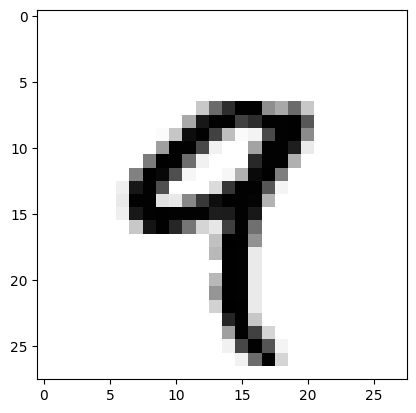

In [6]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



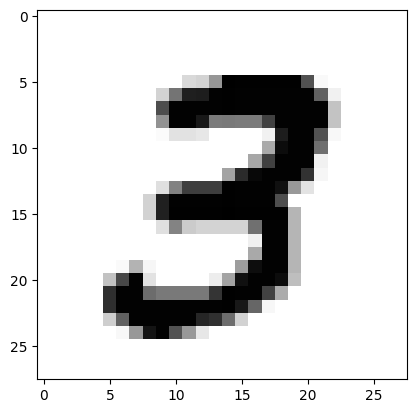

Number of datapoints: 14434



In [7]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print("Number of datapoints: {}\n".format(len(mnist_bin_data)))


**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [9]:
from sklearn import svm
from sklearn import model_selection



trainX, testX= model_selection.train_test_split(mnist_bin_data, train_size=0.7,test_size=0.3)
trainY, testY = model_selection.train_test_split(mnist_bin_target,train_size=0.7,test_size=0.3)


#clf = svm.SVC()
#clf.fit(trainX,trainY)

#linear_svc = svm.SVC(kernel='linear')
#linear_svc.fit(trainX,trainY)

poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(trainX,trainY)

#rbf_svc = svm.SVC(kernel='rbf')
#rbf_svc.fit(trainX,trainY)

#sig_svc = svm.SVC(kernel='sigmoid')
#sig_svc.fit(trainX,trainY)


SVC(kernel='poly')

In [ ]:
prediction = clf.predict(trainX)


In [16]:
testPredictions = clf.predict(testX)

In [19]:
from sklearn.metrics import confusion_matrix

print(testY)

confusion_matrix(trainY, prediction)

32786    3
5970     3
29859    7
18107    7
875      3
        ..
55914    3
50336    3
62020    3
49410    3
38075    7
Name: class, Length: 4331, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


array([[2799, 2179],
       [1098, 4027]])

**Exercise 2:** In the experiments done in Exercise 1 you applied generic "off-the-shelf" kernels to the original data representation given by a 28 x 28 matrix. Can you think of other data transformations that are more directly targeted at constructing features that are informative for the character recognition task (remember e.g. the exercise from last week to construct features for making the x-or data linearly separable)? You should consider the following two approaches:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features (ideally, given the new features, only a linear SVM then is needed). Transform the data into your new feature space, and learn new classifiers. What accuracies do you get? It is not expected that you get higher accuracies than with the best SVM from Exercise 1. What you should aim for is that you get better accuracies when you apply a linear SVM to your transformed data, than when you apply a linear SVM to the original data.

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.